# 📚 Procrustes Alignment Exercise on Standford Bunny 🐇 (16 Points)
## 🔍 Align 3D Point Clouds with Rigid Transformations

## 🛠 Setup Environment
First, let's install required packages:

## 📦 Import Libraries

In [1]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown

# Set random seed for reproducibility
np.random.seed(42)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## 🐰 Load Stanford Bunny

In [2]:
# Target point cloud
mesh_path = o3d.data.BunnyMesh().path  # Updated for newer Open3D versions
mesh = o3d.io.read_triangle_mesh(mesh_path)
pcd = mesh.sample_points_poisson_disk(750)
original_points = np.asarray(pcd.points)

# 🌈 Visualize original point cloud
original_pcd = pcd
original_pcd.paint_uniform_color([0.2, 0.8, 0.2])  # Green
o3d.visualization.draw_plotly([original_pcd],
                                 window_name="Original Bunny")

## 🌀 Create Transformed Point Cloud

In [3]:
def random_rotation_matrix():
    """Generate random 3D rotation matrix using SVD"""
    rand_mat = np.random.rand(3, 3)
    U, _, Vt = np.linalg.svd(rand_mat)
    R = U @ Vt
    if np.linalg.det(R) < 0:
        Vt[-1,:] *= -1
        R = U @ Vt
    return R

# Create transformation components
R_true = random_rotation_matrix()
t_true = np.random.rand(3) * 0.3

# Apply transformation
transformed_points = (R_true @ original_points.T).T + t_true

# Create transformed point cloud
transformed_pcd = o3d.geometry.PointCloud()
transformed_pcd.points = o3d.utility.Vector3dVector(transformed_points)
transformed_pcd.paint_uniform_color([0.8, 0.2, 0.2])  # Red

# Visualize both clouds
o3d.visualization.draw_plotly([original_pcd, transformed_pcd],
                                 window_name="Original vs Transformed")

## 🧮 Procrustes Alignment Implementation (8 Points)
**Exercise: Complete the implementation of Procrustes Alignment by**
- **Centering data**
- **Computing R rotation and t translation**
- **Compute the aligned point cloud considering R&t**

In [4]:
def procrustes_alignment(source, target):
    """
    📐 Perform Procrustes alignment of source to target
    Args:
        source: (N,3) array of source points
        target: (N,3) array of target points
    Returns:
        aligned_source: (N,3) aligned source points
        R: (3,3) rotation matrix
        t: (3,) translation vector
    """
    # 🎯 Step 1: Center the data
    source_mean = np.mean(source, axis=0)
    target_mean = np.mean(target, axis=0)
    source_cent = source-source_mean
    target_cent = target-target_mean

    # 🔍 Step 2: Compute rotation and translation estimates
    cross_cov = target_cent.T@source_cent
    U, Sigma, Vt = np.linalg.svd(cross_cov)
    R = U@Vt
    t = -R@source_mean + target_mean

    #  Step 3: Align points
    aligned_source = R@source.T + t[:,np.newaxis]

    return aligned_source.T, R, t

## 🧪 Apply Procrustes Alignment

In [5]:
# Align transformed points
aligned_points, R_est, t_est = procrustes_alignment(transformed_points, original_points)

# Create aligned point cloud
aligned_pcd = o3d.geometry.PointCloud()
aligned_pcd.points = o3d.utility.Vector3dVector(aligned_points)
aligned_pcd.paint_uniform_color([0.2, 0.2, 0.8])  # Blue

# Visualize results
o3d.visualization.draw_plotly([original_pcd, transformed_pcd, aligned_pcd],
                                 window_name="Alignment Results")

**Expected Results**:<br>
![ProcAl](./../data/proc_align.png)

## 📊 Quantitative Evaluation

In [6]:
def calculate_rmse(points_a, points_b):
    return np.sqrt(np.mean(np.sum((points_a - points_b)**2, axis=1)))

transformed_error = calculate_rmse(transformed_points, original_points)
aligned_error = calculate_rmse(aligned_points, original_points)

display(Markdown(f"""
**Alignment Results:**
- 🔴 Transformed RMSE: {transformed_error:.6f}
- 🔵 Aligned RMSE: {aligned_error:.6f}
- 🌀 Rotation Error: {np.linalg.norm(R_true - R_est):.6f}
- 🏃 Translation Error: {np.linalg.norm(t_true - t_est):.6f}
"""))


**Alignment Results:**
- 🔴 Transformed RMSE: 0.478067
- 🔵 Aligned RMSE: 0.000000
- 🌀 Rotation Error: 2.591727
- 🏃 Translation Error: 0.597012


***Expected Results:***

🔴 Transformed RMSE: 0.478296<br>
🔵 Aligned RMSE: 0.000000<br>
🌀 Rotation Error: 2.591727<br>
🏃 Translation Error: 0.597012<br>

# 🌀 Create Scaled, Rotated & Translated Cloud

In [7]:

def generate_random_transform():
    """🎲 Generate random transformation parameters"""
    return {
        'scale': np.random.uniform(0.5, 2.0),  # Random scaling factor
        'rotation': random_rotation_matrix(),
        'translation': np.random.uniform(-0.5, 0.5, size=3)
    }

def random_rotation_matrix():
    """🌀 Generate random 3D rotation matrix"""
    theta = np.random.uniform(0, 2*np.pi)  # Random angle
    axis = np.random.randn(3)  # Random rotation axis
    axis /= np.linalg.norm(axis)
    return o3d.geometry.get_rotation_matrix_from_axis_angle(axis * theta)

# 🔄 Apply composite transformation
transform_params = generate_random_transform()
S = np.diag([transform_params['scale']]*3)  # Scaling matrix
R = transform_params['rotation']
t = transform_params['translation']

transformed_points = (R @ S @ original_points.T).T + t

# 🔴 Create transformed point cloud
transformed_pcd = o3d.geometry.PointCloud()
transformed_pcd.points = o3d.utility.Vector3dVector(transformed_points)
transformed_pcd.paint_uniform_color([0.8, 0.1, 0.1])  # Crimson red

# 📊 Visualize transformation
o3d.visualization.draw_plotly([original_pcd, transformed_pcd],
                                 window_name="Original vs Transformed",
                                 width=800, height=600)

**Expected behaviour:**<br>
![ProcAlign2](./../data/proc_align_final.png)

# 🧮 Generalized Procrustes Analysis (8 Points)
**Exercise: Complete the implementation of generalized Procrustes Alignment by**
- **Centering data**
- **Computing S scale, R rotation and t translation**
- **Compute the aligned point cloud considering S & R & t**

In [8]:

def generalized_procrustes(source, target):
    """
    📐 Perform Procrustes alignment with scaling
    Args:
        source: (N,3) source points
        target: (N,3) target points
    Returns:
        aligned_source: (N,3) aligned points
        scale: scaling factor
        R: (3,3) rotation matrix
        t: (3,) translation vector
    """
    # 🎯 Step 1: Center both point clouds
    source_mean = np.mean(source, axis=0)
    target_mean = np.mean(target, axis=0)
    source_cent = source-source_mean
    target_cent = target-target_mean

    # 📏 Step 2: Compute optimal scaling, rotation and translation
    cross_cov = target_cent.T@source_cent
    U, Sigma, Vt = np.linalg.svd(cross_cov)
    R = U@Vt
    scale = np.sum(Sigma)/np.linalg.norm(source_cent, ord='fro')**2
    t = -scale*R@source_mean + target_mean
    
    # 🏃 Step 3: Apply full transformation
    aligned_source = scale*R@source.T + t[:,np.newaxis]

    return aligned_source.T, scale, R, t

# 🧪 Perform Alignment & Evaluation

In [9]:
aligned_points, s_est, R_est, t_est = generalized_procrustes(
    transformed_points, original_points)

# 🔄 Align transformed points to original

In [10]:
# 🔵 Create aligned point cloud
aligned_pcd = o3d.geometry.PointCloud()
aligned_pcd.points = o3d.utility.Vector3dVector(aligned_points)
aligned_pcd.paint_uniform_color([0.1, 0.1, 0.8])  # Royal blue

PointCloud with 750 points.

# 📊 Visualize all point clouds

In [11]:
o3d.visualization.draw_plotly([original_pcd, transformed_pcd, aligned_pcd],
                                 window_name="Alignment Results",
                                 width=800, height=600)

**Expected behaviour:**<br>
![ProcAlignGeneral](./../data/proc_align_general_final.png)

# 📈 Quantitative Analysis

In [12]:
def calculate_metrics(true_params, est_params):
    """📏 Calculate transformation parameter errors"""
    return {
        'scale_error': abs(true_params['scale'] - est_params['scale']),
        'rotation_error': np.linalg.norm(true_params['rotation'] - est_params['R']),
        'translation_error': np.linalg.norm(true_params['translation'] - est_params['t'])
    }

# 🧮 Calculate errors
errors = calculate_metrics(transform_params,
                          {'scale': s_est, 'R': R_est, 't': t_est})

# 📊 Create formatted results display

In [13]:
result_text = f"""
## 📊 Alignment Results

| Metric               | Value          |
|----------------------|----------------|
| 🔴 Initial Scale     | {transform_params['scale']:.4f} |
| 🔵 Estimated Scale   | {s_est:.4f} |
| 🌀 Scale Error       | {errors['scale_error']:.6f} |
| 🔴 Rot. Error        | {errors['rotation_error']:.6f} |
| 🔴 Trans. Error      | {errors['translation_error']:.6f} |
"""

display(Markdown(result_text))


## 📊 Alignment Results

| Metric               | Value          |
|----------------------|----------------|
| 🔴 Initial Scale     | 1.7487 |
| 🔵 Estimated Scale   | 0.5719 |
| 🌀 Scale Error       | 1.176799 |
| 🔴 Rot. Error        | 2.749609 |
| 🔴 Trans. Error      | 0.374494 |


📊 ***Expected Alignment Results<br>***
Metric   -       	Value <br>
🔴 Initial Scale -	1.7487<br>
🔵 Estimated Scale -	0.5719<br>
🌀 Scale Error -	1.176799<br>
🔴 Rot. Error - 2.749609<br>
🔴 Trans. Error - 0.374494<br>

# 🎨 3D Matplotlib Visualization

/tmp/ipykernel_13652/1532606425.py:18: UserWarning:

Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) DejaVu Sans.

/home/blancocd/miniconda3/envs/3DVision-ex3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) DejaVu Sans.



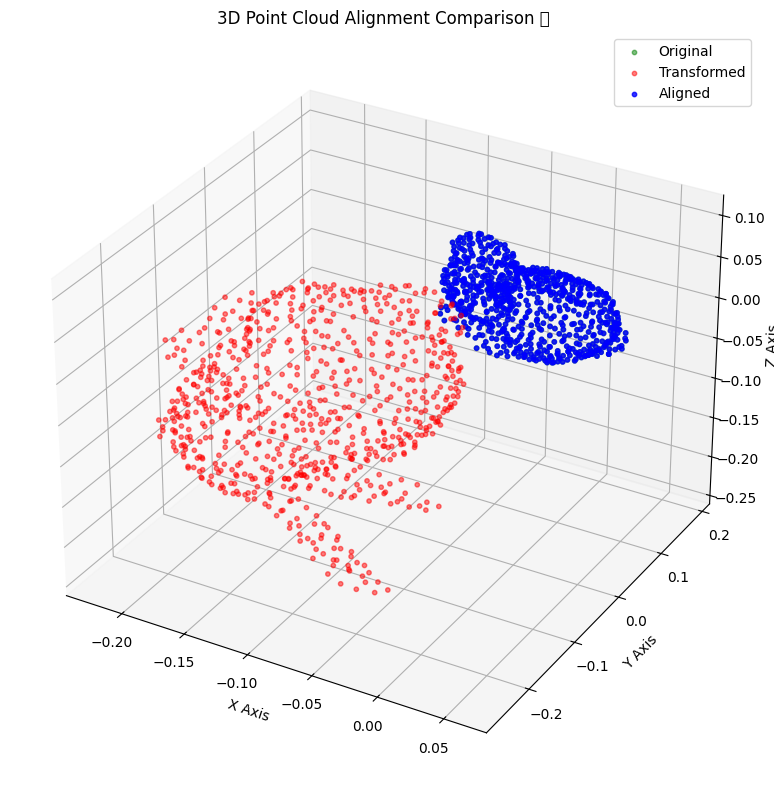

In [14]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot point clouds
ax.scatter(original_points[:,0], original_points[:,1], original_points[:,2],
          c='green', label='Original', s=10, alpha=0.5)
ax.scatter(transformed_points[:,0], transformed_points[:,1], transformed_points[:,2],
          c='red', label='Transformed', s=10, alpha=0.5)
ax.scatter(aligned_points[:,0], aligned_points[:,1], aligned_points[:,2],
          c='blue', label='Aligned', s=10, alpha=0.8)

# Format plot
ax.set_title('3D Point Cloud Alignment Comparison 🌐')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.legend()
plt.tight_layout()
plt.show()

**Expected behaviour:**<br>
![PCDAlign](./../data/pcd_alignment.png)

## 🎉 Conclusion
1. Procrustes Alignment effectively recovers rigid transformations
2. Essential for point cloud registration
3. Foundation for complex alignment algorithms